In [1]:
%matplotlib inline

import ndmg.utils as ndu
import ndmg.register as ndr
import ndmg.track as ndt
import ndmg.graph as ndg
import matplotlib.pylab as plt
import numpy as np
import nibabel as nb
import os.path
from datetime import datetime

In [2]:
"""
Create files list (will ordinarily be parsed from commandline)
"""

startTime = datetime.now()

baseDir = '/Users/graywr1/files_for_m2g/'
bval = os.path.join(baseDir, 'KKI2009_113_1_DTI.bval')
bvec = os.path.join(baseDir, 'KKI2009_113_1_DTI.bvec')
dwi = os.path.join(baseDir, 'KKI2009_113_1_DTI.nii')
mprage = os.path.join(baseDir, 'KKI2009_113_1_MPRAGE.nii')
atlas = os.path.join(baseDir, 'MNI152_T1_1mm.nii.gz')
labels= os.path.join(baseDir, 'desikan.nii.gz')
mask = os.path.join(baseDir, 'MNI152_T1_1mm_brain_mask.nii.gz')
aligned_dwi = os.path.join(baseDir, 'KKI2009_113_1_DTI_aligned.nii.gz')
temp_dwi ='/tmp/dwifile.nii'

print bval

/Users/graywr1/files_for_m2g/KKI2009_113_1_DTI.bval


In [3]:
gtab = ndr().dwi2atlas(temp_dwi, bval, bvec, mprage, atlas, aligned_dwi)

B-values shape (33,)
         min 0.000000 
         max 700.000000 
B-vectors shape (33, 3)
         min -0.996763 
         max 1.000000 
None
Executing: eddy_correct /tmp/dwifile_t1.nii.gz /tmp/dwifile_t2.nii.gz [32]
Executing: flirt -in /tmp/dwifile_b0.nii.gz -ref /Users/graywr1/files_for_m2g/KKI2009_113_1_MPRAGE.nii -omat /tmp/dwifile_KKI2009_113_1_MPRAGE_xfm.mat -cost mutualinfo -bins 256 -dof 12 -searchrx -180 180 -searchry -180 180 -searchrz -180 180
Executing: flirt -in /Users/graywr1/files_for_m2g/KKI2009_113_1_MPRAGE.nii -ref /Users/graywr1/files_for_m2g/MNI152_T1_1mm.nii.gz -omat /tmp/KKI2009_113_1_MPRAGE_MNI152_T1_1mm_xfm.mat -cost mutualinfo -bins 256 -dof 12 -searchrx -180 180 -searchry -180 180 -searchrz -180 180
Executing: flirt -in /tmp/dwifile_t2.nii.gz -ref /Users/graywr1/files_for_m2g/MNI152_T1_1mm.nii.gz -out /Users/graywr1/files_for_m2g/KKI2009_113_1_DTI_aligned.nii.gz -init /tmp/dwifile_MNI152_T1_1mm_xfm.mat -interp trilinear -applyxfm


In [4]:
fibers = ndt().eudx_basic(aligned_dwi, mask, gtab, seed_num=1000000)

In [5]:
fibers2 = ndt().eudx_advanced(aligned_dwi, mask, gtab, seed_num=1000000)

/Users/graywr1/anaconda/lib/python2.7/site-packages/dipy/reconst/csdeconv.py:129: UserWarning: Number of parameters required for the fit are more than the actual data points
  warnings.warn(msg, UserWarning)


tensors...


/Users/graywr1/anaconda/lib/python2.7/site-packages/dipy/reconst/csdeconv.py:576: UserWarning: maximum number of iterations exceeded - failed to converge
  warnings.warn(msg)
/Users/graywr1/anaconda/lib/python2.7/site-packages/dipy/direction/peaks.py:504: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(numer / denom)
/Users/graywr1/anaconda/lib/python2.7/site-packages/dipy/direction/peaks.py:504: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(numer / denom)
/Users/graywr1/anaconda/lib/python2.7/site-packages/dipy/reconst/csdeconv.py:576: UserWarning: maximum number of iterations exceeded - failed to converge
  warnings.warn(msg)
/Users/graywr1/anaconda/lib/python2.7/site-packages/dipy/reconst/csdeconv.py:576: UserWarning: maximum number of iterations exceeded - failed to converge
  warnings.warn(msg)
/Users/graywr1/anaconda/lib/python2.7/site-packages/dipy/reconst/csdeconv.py:576: UserWarning: maximum number of iterations excee

In [6]:
labels_im = nb.load(labels)

graph = ndg(len(np.unique(labels_im.get_data()))-1, labels)
graph.make_graph(fibers)
g1 = graph.get_graph()
graph.summary()

# of Streamlines: 188835
0
25000
50000
75000
100000
125000
150000
175000
Graph attributes: None
Number of nodes: 70
Node attributes: ids
Number of edges: 1183
Edge attributes: weight


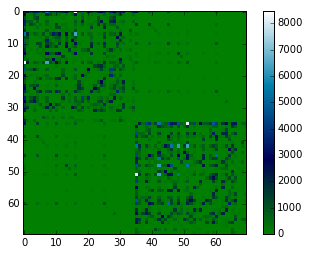

In [7]:
# plot graph

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
G1 = g1.get_adjacency(attribute='weight')
G1 = np.asarray(G1.data)

plt.imshow(G1, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
#plt.savefig(subLabel+'.png')
plt.show()

In [8]:
#graph.save_graph()

In [9]:
print datetime.now() - startTime


0:47:50.866344


In [10]:
# Graph 2

labels_im = nb.load(labels)

graph2 = ndg(len(np.unique(labels_im.get_data()))-1, labels)
graph2.make_graph(fibers2)
g2 = graph2.get_graph()
graph2.summary()

# of Streamlines: 672730
0
25000
50000
75000
100000
125000
150000
175000
200000
225000
250000
275000
300000
325000
350000
375000
400000
425000
450000
475000
500000
525000
550000
575000
600000
625000
650000
Graph attributes: None
Number of nodes: 70
Node attributes: ids
Number of edges: 1936
Edge attributes: weight


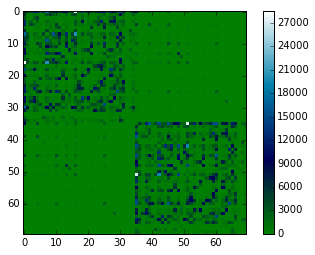

In [11]:
# plot graph2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
G2 = g2.get_adjacency(attribute='weight')
G2 = np.asarray(G2.data)

plt.imshow(G2, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
#plt.savefig(subLabel+'.png')
plt.show()

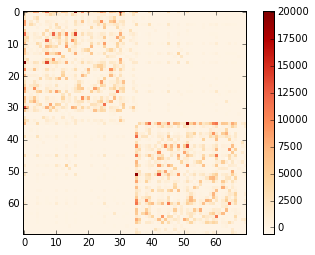

In [12]:
plt.imshow(G2-G1, interpolation='nearest', cmap=plt.cm.OrRd)
plt.colorbar()
plt.show()